In [1]:
print("roshan")

roshan


In [2]:
import numpy as np

In [5]:
import tensorflow as tf

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [29]:
data_train_path="Desktop/Jupyter notebook/Fruits_Vegetables/train"
data_test_path="Desktop/Jupyter notebook/Fruits_Vegetables/test"
data_val_path="Desktop/Jupyter notebook/Fruits_Vegetables/validation"

In [30]:
img_width=180
img_height=180

In [31]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [32]:
data_cat=data_train.class_names

In [33]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [34]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [35]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


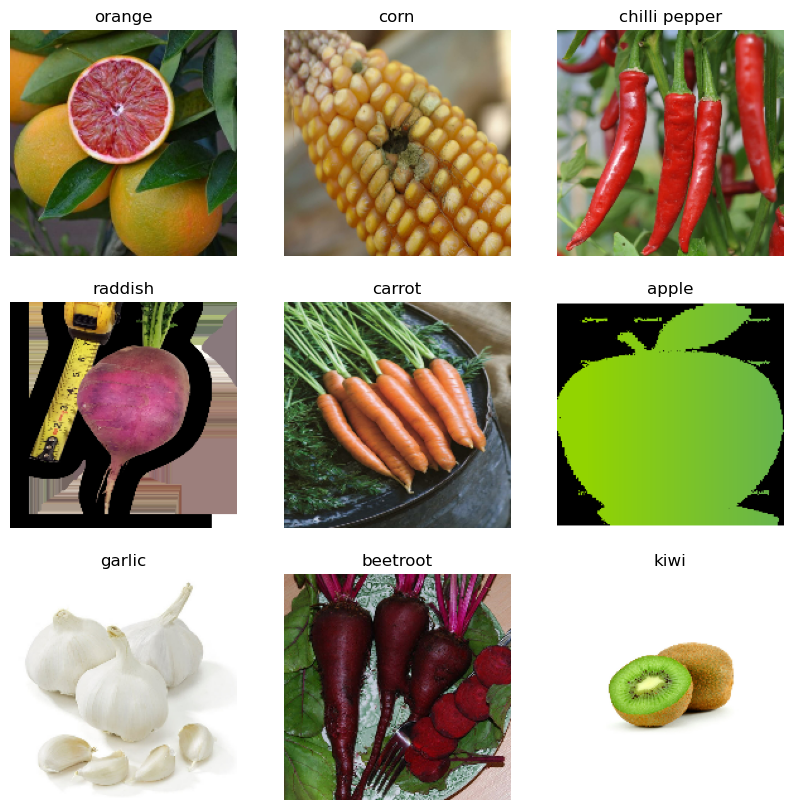

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [37]:
from tensorflow.keras.models import Sequential

In [38]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [39]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [40]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 448ms/step - accuracy: 0.0687 - loss: 3.8808 - val_accuracy: 0.4416 - val_loss: 2.1035
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.3182 - loss: 2.4218 - val_accuracy: 0.7009 - val_loss: 1.2541
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 399ms/step - accuracy: 0.5124 - loss: 1.6836 - val_accuracy: 0.8632 - val_loss: 0.6466
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 401ms/step - accuracy: 0.7331 - loss: 0.9674 - val_accuracy: 0.9202 - val_loss: 0.4577
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 0.8563 - loss: 0.5202 - val_accuracy: 0.9345 - val_loss: 0.3985
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 399ms/step - accuracy: 0.8937 - loss: 0.3741 - val_accuracy: 0.9459 - val_loss: 0.4055
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 393ms/step - accuracy: 0.9356 - loss: 0.2537 - val_accuracy: 0.9459 - val_loss: 0.3712
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 399ms/step - accuracy: 0.9510 - loss: 0.1941 - val_accu

In [41]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
data_val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Text(0.5, 1.0, 'loss')

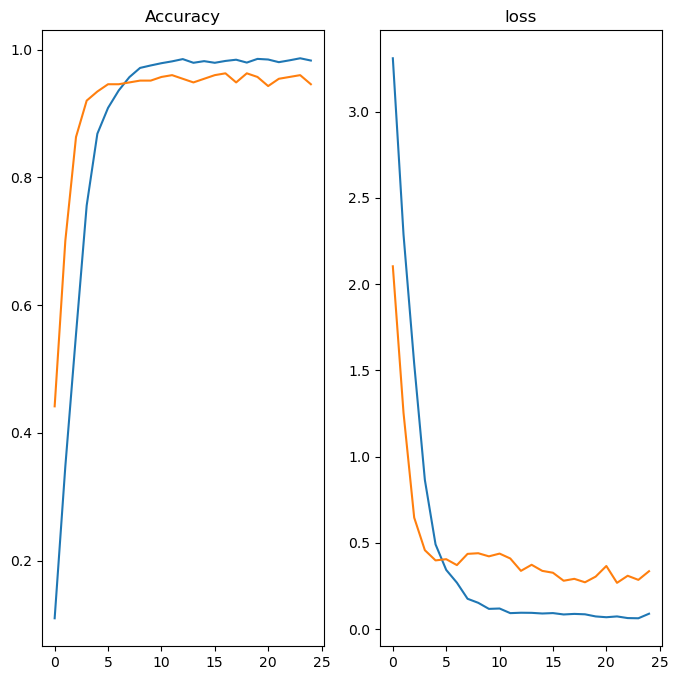

In [43]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='training accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='training accuracy')
plt.plot(epochs_range,history.history['val_loss'],label='validation loss')
plt.title('loss')


In [44]:
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import tensorflow as tf

In [61]:
image_path='Banana.jpeg'
image = keras_image.load_img(image_path,target_size=(img_width,img_height))
img_arr = keras_image.img_to_array(image)
img_bat = np.expand_dims(img_arr,axis=0)

In [62]:
predictions=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [63]:
score=tf.nn.softmax(predictions)

In [64]:
print('Veg/fruit in image is {} with an accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/fruit in image is banana with an accuracy of 99.73


In [59]:
model.save('Image_classify.keras')